# K-means的原理

`K-means`（K均值聚类）是一种基于中心的聚类算法，通过迭代，将样本分到K个类中，使每个样本与其所属类中心的距离之和最小。

## 损失函数

- 给定数据集$\{x_1, x_2,..., x_N\}$，每个样本的特征维度是$m$维，我们的目标是将数据集划分为$K$个类别。
- 假定$K$值已经给定，第$k$个类别的中心定义为$μ_k,k=1,2,..., K$，$μ_k$也是一个$m$维的特征向量。
- 需要找到每个样本所属的类别，以及一组向量$\{μ_k\}$，使每个样本与其所属类别的中心$μ_k$的距离之和最小。
- 聚类需要根据样本之间的相似度，对样本集合进行划分，将相似度较高的样本归为一类。
- 可以通过计算样本之间的欧氏距离、马氏距离、余弦距离或相关系数，来衡量样本之间的相似度
- 而K-means是用欧氏距离的平方来度量样本之间的相似度。欧式距离的平方公式如下：
$$d(x_i,x_j)=\sum_{k=1}^{m}(x_{ik}-x_{jk})^2$$
- 把所有样本与所属类中心的距离平方和，定义为损失函数：
$$J=\sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}\|x_n-μ_k\|^2$$
    - 其中$r_{nk}\in\{0,1\}$，表示第$n$个样本是否属于第$k$类
    - 需要找到$\{r_{nk}\}$和$\{μ_k\}$的值，使得损失函数最小

## 训练过程


K-means是一种迭代算法，每次迭代涉及到两个连续的步骤，分别对应$r_{nk}$的最优化和$μ_k$的最优化，也对应着EM算法的E步（求期望）和M步（求极大）两步。

首先，为$\{μ_k\}$选择一些初始值，也就是初始化$K$个类中心。

然后，重复执行以下两个步骤，直至收敛。

第一步：保持$\{μ_k\}$固定，选择$\{r_{nk}\}$来最小化J，也就是把样本指派到与其最近的中心所属的类中，得到一个聚类结果。
   - 在类中心$\{μ_k\}$已经确定的情况下，最优化$\{r_{nk}\}$；每个样本遍历所有的$μ_k$求欧氏距离，如果样本和第$k$个类别的距离最小，那么令$r_{nk}=1$

第二步：保持$\{r_{nk}\}$固定，计算$\{μ_k\}$来最小化J，也就是更新每个类别的中心。
   - 目标函数J是$μ_k$的一个二次函数，令它关于$μ_k$的导数为零，就可以求得使目标函数达到最小值的$μ_k$，即
   $$2\sum_{n=1}^{N}r_{nk}(x_n-μ_k)=0$$
   - 解出$μ_k$的结果为：
   $$μ_k=\frac{\sum_{n}r_{nk}x_n}{\sum_{n}r_{nk}}$$

- K-means可能收敛到目标函数J的局部极小值，不能保证收敛到全局最小值。
- 聚类之前，需要对数据集进行标准化，使样本的均值为0，标准差为1。
- 初始类中心的选择会直接影响聚类结果，选择不同的初始类中心，可能会得到不同的聚类结果。
- K均值聚类算法的复杂度是O(mnk)，m是样本的特征维度，n是样本个数，k是类别个数。

## 类别数K的确定

### 轮廓系数

轮廓系数（Silhouette Coefficient）可以用来判定聚类结果的好坏，也可以用来确定类别数K。

一个好的聚类结果，要能保证类别内部样本之间的距离尽可能小（密集度），而类与类之间样本的距离尽可能大（离散度）。

轮廓系数就是一个用来度量聚类的密集度和离散度的综合指标。

轮廓系数的计算过程和使用如下：
- 计算样本xi到同类Ck其他样本的平均距离ai，将ai称为样本xi的簇内不相似度，ai越小，说明样本xi越应该被分配到该类。
- 计算样本xi到其他类Cj所有样本的平均距离bij，j=1, 2 ,..., K，j≠k，称为样本xi与类别Cj的不相似度。
- 定义样本xi的簇间不相似度：bi =min{bi1, bi2, ...,bij,..., biK}，j≠k，bi越大，说明样本xi越不属于其他簇。
- 根据样本xi的簇内不相似度ai和簇间不相似度bi，定义样本xi的轮廓系数si，作为样本xi分类合理性的度量。
$$
s_i=\frac{b_i-a_i}{max(a_i,b_i)}
\begin{equation}
=\left\{
\begin{aligned}
1-\frac{a_i}{b_i} & , & a_i<b_i \\
0 & , & a_i=b_i \\
\frac{b_i}{a_i}-1 & , & a_i>b_i
\end{aligned}
\right.
\end{equation}
$$
- 轮廓系数范围在[-1,1]之间，该值越大，聚类结果越好。
si接近1，则样本xi被分配到类别Ck的结果比较合理；si接近0，说明样本xi在两个类的边界上；si接近-1，说明样本xi更应该被分配到其他类别。
- 计算所有样本的轮廓系数si的均值，得到聚类结果的轮廓系数S，作为聚类结果合理性的度量。轮廓系数越大，聚类结果越好。
- 使用不同的K值进行K均值聚类，计算各自的轮廓系数S，选择较大的轮廓系数所对应的K值。

### 肘部法则
从类别数K=1开始，当类别数K小于真实的类别数时，随着类别数的增大，误差平方和SSE会快速地下降。

而当类别数到达真实类别数的临界点后，SSE开始缓慢下降，也就是说SSE和K的关系曲线一个肘部形状，这个肘部所对应的K值可以认为是合适的类别数。

那么我们选择不同的K值，训练多个模型，然后计算模型的SSE，选择SSE开始缓慢下降时的K值，作为聚类的类别数。

## 初始化类中心
首先随机选择一个点，作为第一个初始类中心点，然后计算该点与其他所有样本点的距离，选择距离最远的点，作为第二个初始类的中心点，以此类推，直到选出K个初始类中心点。

# sklearn的KMeans

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

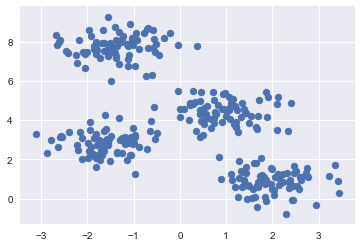

In [3]:
# 数据集

from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

plt.scatter(x[:,0],x[:,1],s=50)

In [4]:
# KMeans模型

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)


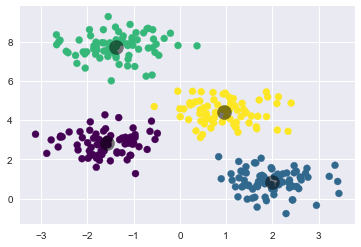

In [5]:
# 可视化聚类结果

plt.scatter(x[:,0],x[:,1],c=y_kmeans,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

# 自定义的kmeans算法

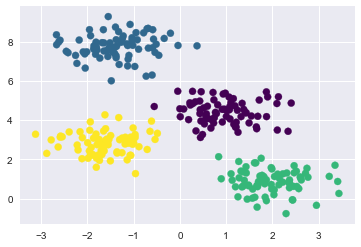

In [6]:
### 自定义的kmeans方法！！

from sklearn.metrics import pairwise_distances_argmin


def find_clusters(x, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    '''随机排列后，随机选择初始中心点'''
    centers = x[i]

    while True:
        labels = pairwise_distances_argmin(x, centers)
        new_centers = np.array(
            [x[labels == i].mean(0) for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return (centers, labels)


centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

# Kmeans的缺陷

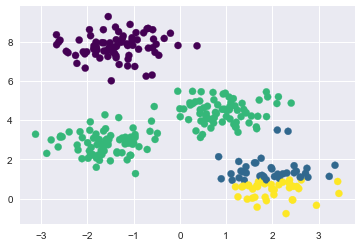

In [10]:
# 可能无法获得全局最优解
# rseed由2改为0，改变初始中心点的设置，聚类结果发生了改变

centers,labels = find_clusters(x, 4, rseed=0)
plt.scatter(x[:, 0], x[:, 1], c=labels,
            s=50, cmap='viridis')

- 必须明确指明clusters的数量！！！
- k-means is limited to linear cluster boundaries

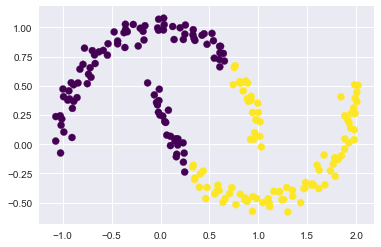

In [11]:
# 线性边界导致特殊结构的数据无法正确划分

from sklearn.datasets import make_moons
x, y = make_moons(200, noise=0.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

D:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


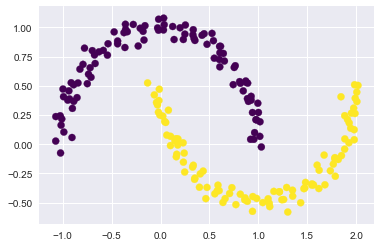

In [14]:
# SpectralClustering可以正确划分线性不可分的数据

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

# 示例：对数字聚类

In [12]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

### digits为supervised data 

(1797, 64)

In [13]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

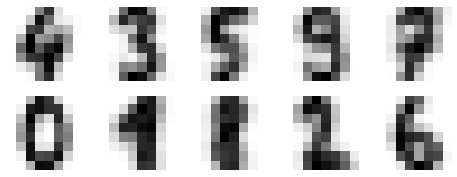

In [14]:
# 样本数据

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [52]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [53]:
# 聚类精度

from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

0.7918753478018921

Text(92.68,0.5,'predicted label')

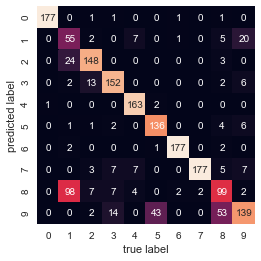

In [54]:
# 混淆矩阵

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

In [55]:
### use the t-distributed stochastic neighbor embedding (t-SNE) algorithm
### to pre-process the data before performing k-means

from sklearn.manifold import TSNE

# 对数据降维后，提升聚类效果
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

0.9326655537006121

# 示例：k-means用于图片压缩

D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


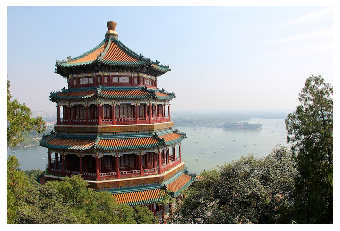

In [57]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [58]:
### (height, width, RGB)
china.shape

(427, 640, 3)

In [60]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [63]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

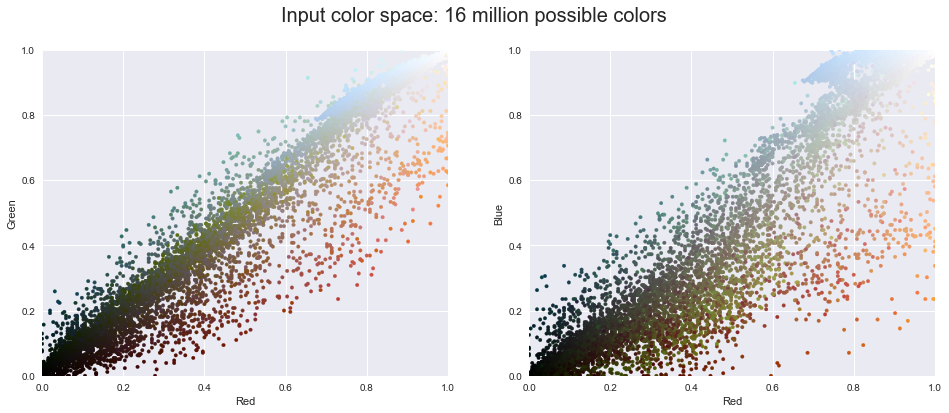

In [64]:
plot_pixels(data,title='Input color space: 16 million possible colors')

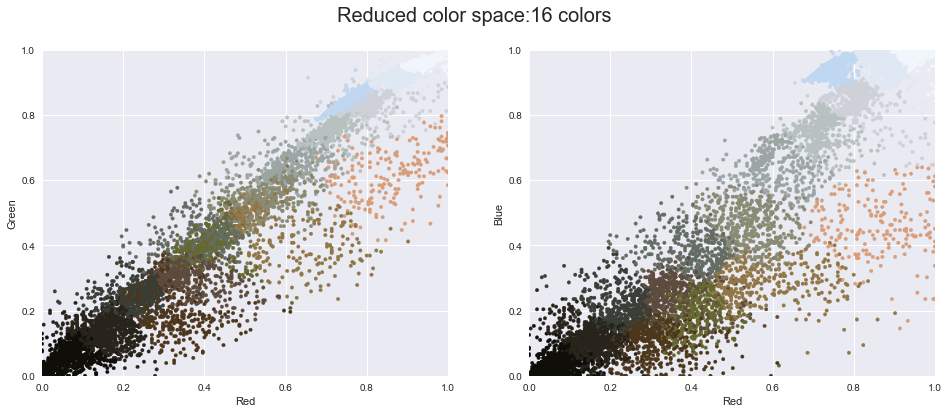

In [66]:
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans


kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space:16 colors')

Text(0.5,1,'16-color Image')

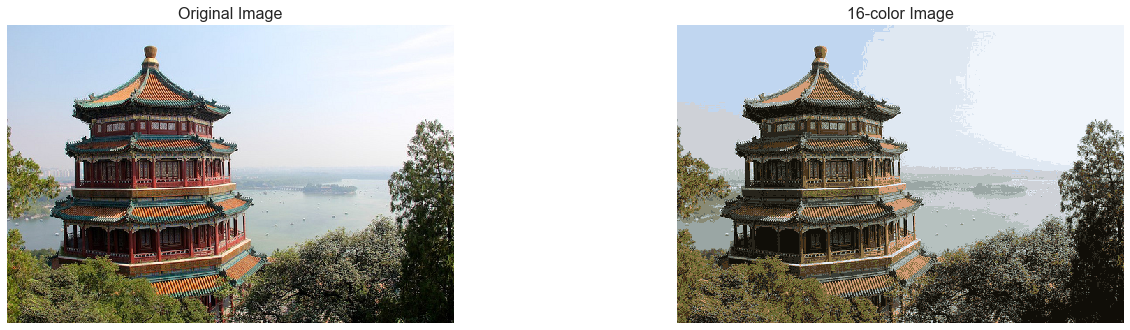

In [67]:
china_colored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1,
                       2,
                       figsize=(20, 12),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.5)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_colored)
ax[1].set_title('16-color Image', size=16)

# 可视化聚类算法过程

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


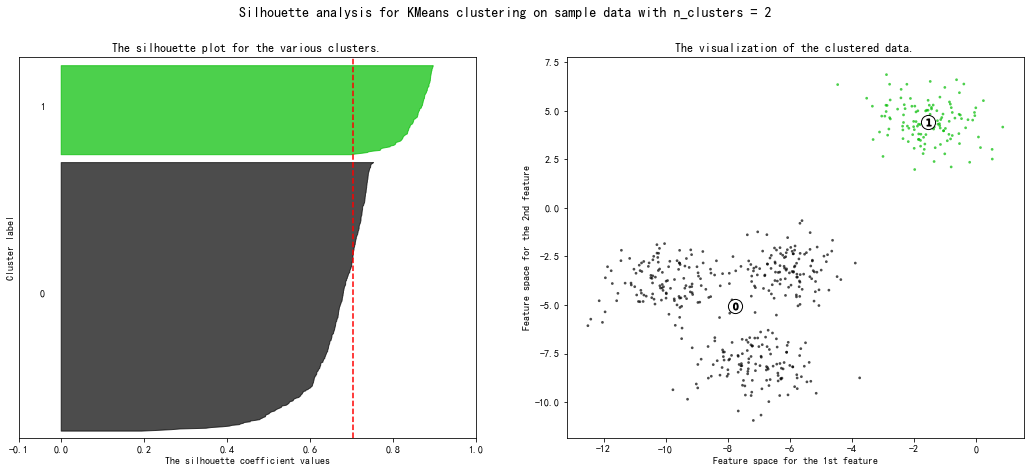

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


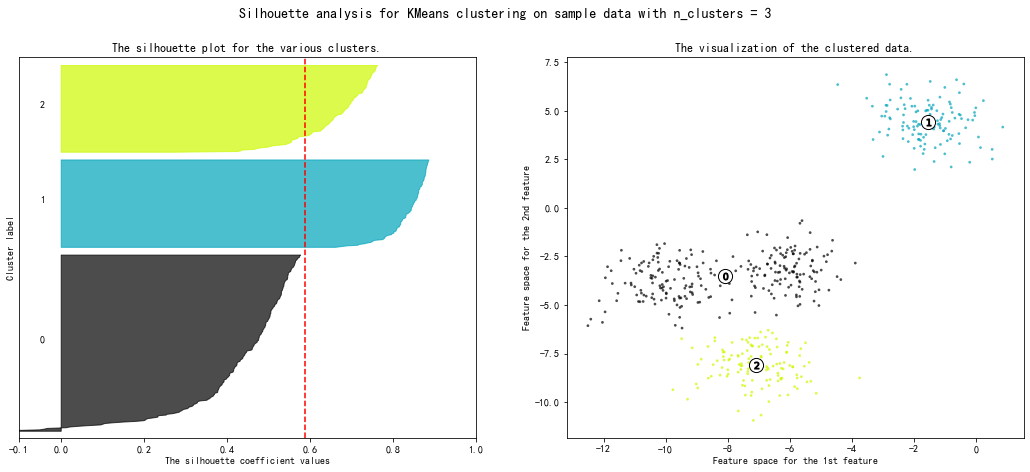

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


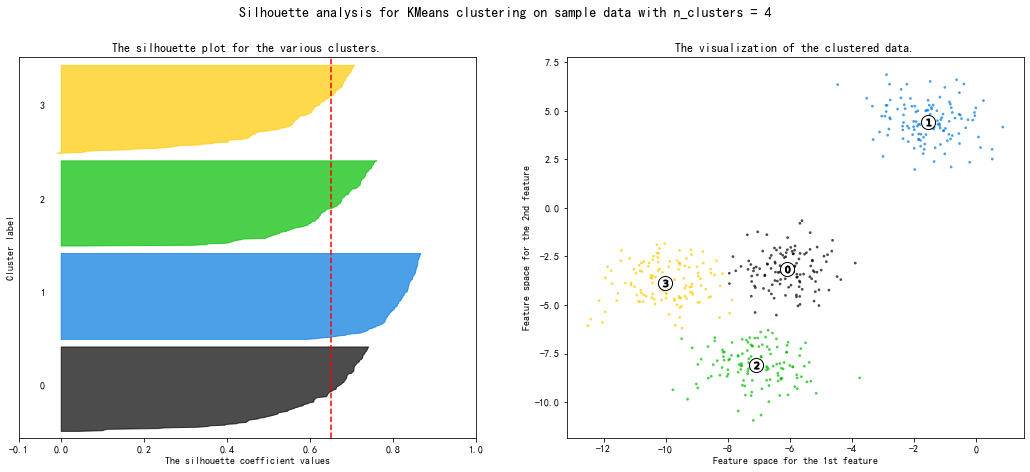

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


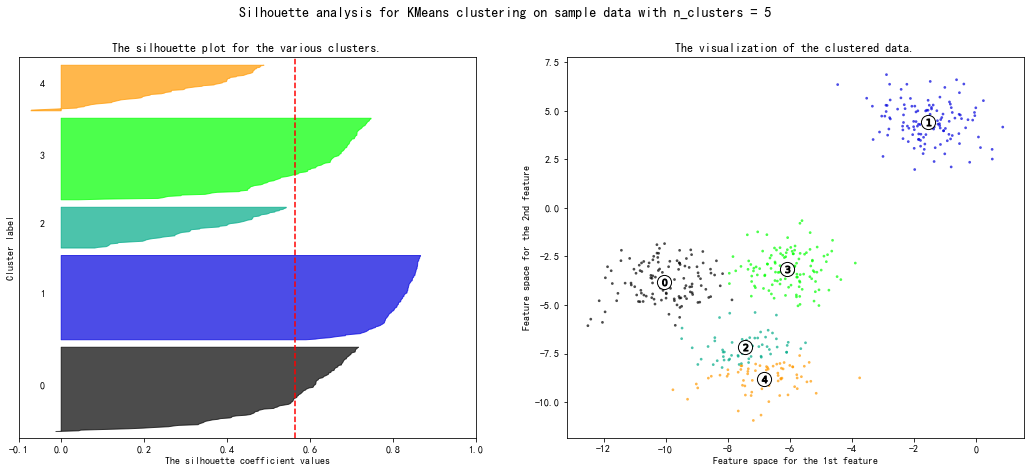

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


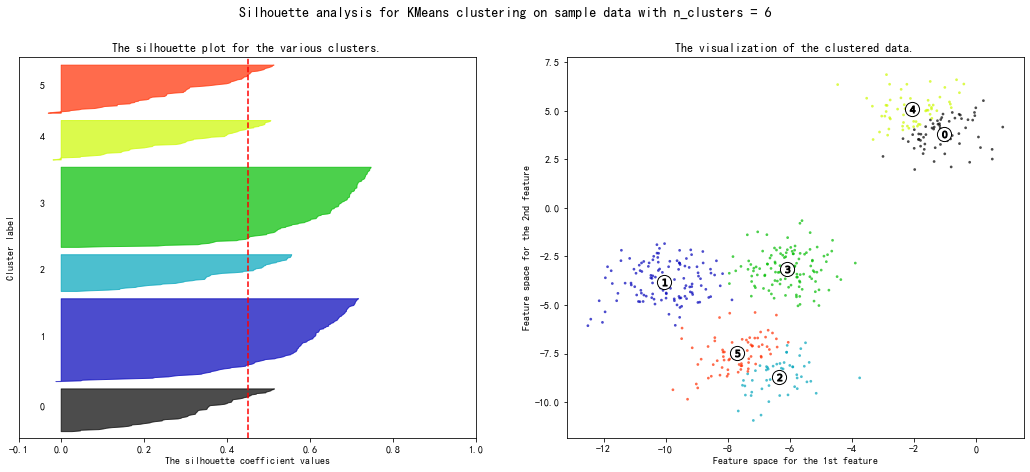

In [2]:
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :",
          silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0],
                X[:, 1],
                marker='.',
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0],
                centers[:, 1],
                marker='o',
                c="white",
                alpha=1,
                s=200,
                edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0],
                    c[1],
                    marker='$%d$' % i,
                    alpha=1,
                    s=50,
                    edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14,
                 fontweight='bold')

    plt.show()

Text(0.98, 0.98, 'Final Clustering')

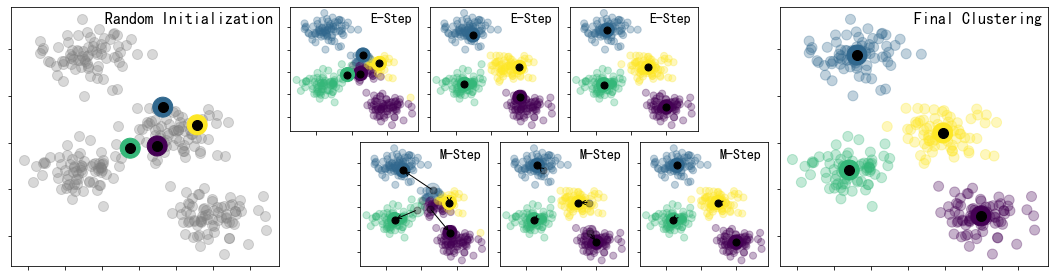

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300,
                       centers=4,
                       cluster_std=0.60,
                       random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis', s=50 * factor, alpha=0.3)


def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0],
               centers[:, 1],
               c=np.arange(4),
               cmap='viridis',
               s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0],
               centers[:, 1],
               c='black',
               s=50 * factor,
               alpha=alpha)


def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax


fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4,
                  15,
                  left=0.02,
                  right=0.98,
                  bottom=0.05,
                  top=0.95,
                  wspace=0.2,
                  hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98,
         0.98,
         "Random Initialization",
         transform=ax0.transAxes,
         ha='right',
         va='top',
         size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('',
                     new_centers[i],
                     centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))

    # Finish iteration
    centers = new_centers
    ax1.text(0.95,
             0.95,
             "E-Step",
             transform=ax1.transAxes,
             ha='right',
             va='top',
             size=14)
    ax2.text(0.95,
             0.95,
             "M-Step",
             transform=ax2.transAxes,
             ha='right',
             va='top',
             size=14)

# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98,
         0.98,
         "Final Clustering",
         transform=axf.transAxes,
         ha='right',
         va='top',
         size=16)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs


def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300,
                      centers=4,
                      random_state=0,
                      cluster_std=0.60)

    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0],
                    X[:, 1],
                    c=labels,
                    s=50,
                    cmap='viridis',
                    vmin=0,
                    vmax=n_clusters - 1)

    def plot_centers(centers):
        plt.scatter(centers[:, 0],
                    centers[:, 1],
                    marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200,
                    cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='black', s=50)

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array(
                    [X[labels == j].mean(0) for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('',
                             centers[i],
                             old_centers[i],
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8,
                     9.5,
                     "1. Reassign points to nearest centroid",
                     ha='right',
                     va='top',
                     size=14)
        elif frame % 3 == 2:
            plt.text(3.8,
                     9.5,
                     "2. Update centroids to cluster means",
                     ha='right',
                     va='top',
                     size=14)

    return interact(_kmeans_step,
                    frame=[0, 5, 10, 20, 30, 40, 50],
                    n_clusters=[min_clusters, 4, max_clusters])


plot_kmeans_interactive()

interactive(children=(Dropdown(description='frame', options=(0, 5, 10, 20, 30, 40, 50), value=0), Dropdown(des…

<function __main__.plot_kmeans_interactive.<locals>._kmeans_step(frame=0, n_clusters=4)>

`K-means clustering`可视化：http://shabal.in/visuals/kmeans/1.html